In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize
import scipy.stats
import seaborn as sns
from scipy.stats import norm



**Datos apartes**

In [3]:
C=3300e-6 # [F] # Capacitancia en faradios, aquí hice la conversión porque estaba en micro faradios
R_teo=10e3 # [Ohm] # valor de resistencia entregado por fabricante
R_exp=10.22e3 #[Ohm] # valor de resistencia medido con multitester
fem=11.98 # [v]

In [4]:
tau_teo=R_exp*C
print(tau_teo)

33.726


## **Carga**

In [5]:
tc=np.array([3.40,5.05,7.03,9.01,10.11,11.98,14.07,16.05,17.03,19.12,21.10,25.03,32.03,42.25,50.17,59.96,70.51,80.30,90.30,100.37,110.27,120.49,130.58,140.86,150.40,170.67,180.23,191.18,215.04,250.44,270.61,287.72,300.54,318.94,336.97,351.46])
t_cc=tc-3.40 # arreglo para que empiece de t=0
vc=np.array([0.00,0.57,1.36,1.95,2.37,2.90,3.51,3.97,4.51,4.91,5.38,6.14,7.14,8.42,9.16,9.89,10.44,10.80,11.09,11.30,11.46,11.58,11.66,11.73,11.78,11.84,11.86,11.88,11.90,11.92,11.93,11.93,11.94,11.95,11.97,11.98])

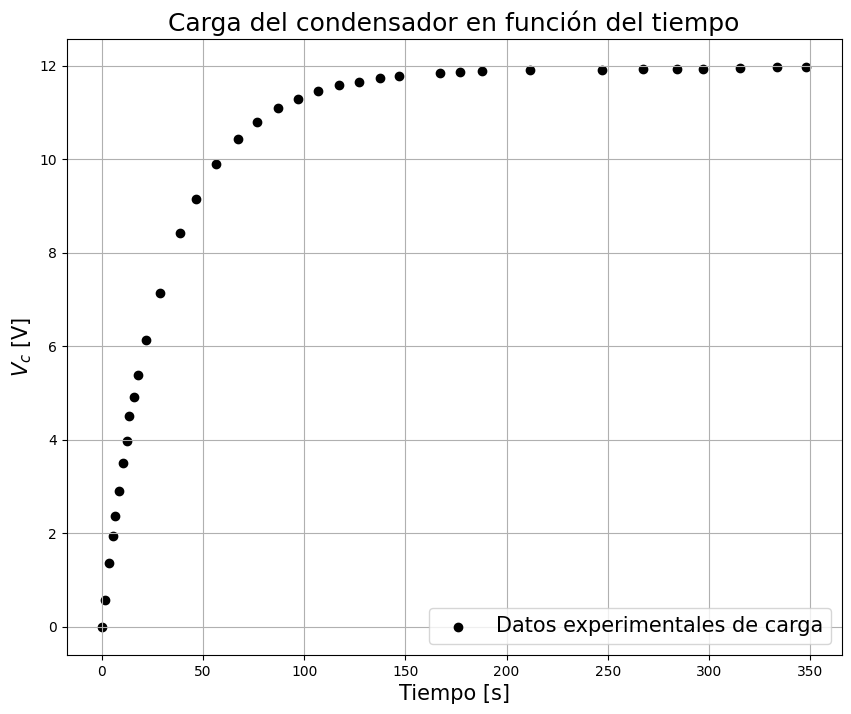

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(t_cc,vc,label=("Datos experimentales de carga"),color="black",marker="o")
#plt.errorbar(t_cc, vc,color="black", yerr=0.07, fmt='.', label='Datos experimentales', capsize=5,marker=".")
plt.title("Carga del condensador en función del tiempo",fontsize=18)
plt.xlabel("Tiempo [s]",fontsize=15);plt.ylabel("$V_c$ [V]",fontsize=15)
plt.grid()
plt.legend(fontsize=15)


In [33]:
def modelo_c(t):
    return np.sum((vc - 11.98*(1-np.exp(-t_cc/t)))**2)

# Establecer un valor inicial 
valor_inicial = 1

# Utilizar minimize para encontrar que minimice la función objetivo
resultado = optimize.minimize(modelo_c, valor_inicial)

# El valor de tiempo de relajación que minimiza la función objetivo
tau_expc = resultado.x[0]

print(r"El tiempo de relajación de carga es:",tau_expc," [s]")

El tiempo de relajación de carga es: 31.316560521022755  [s]


In [11]:
def vc_teo(t):
    return 11.98*(1-np.exp(-t_cc/t))


def chi_squared(observed, expected, errors):
    # Calcula el chi cuadrado usando la fórmula.
    chi2 = np.sum(((observed - expected) ** 2) / (errors ** 2))
    return chi2

sigma_V=0.09
chi2_value = chi_squared(vc,vc_teo(tau_expc),sigma_V)
chi2_redc=chi2_value/len(vc)
print(f"Valor de chi cuadrado: {chi2_value}")
print(f"Valor de chi cuadrado reducido: {chi2_redc}")


Valor de chi cuadrado: 50.65470123253305
Valor de chi cuadrado reducido: 1.407075034237029


In [34]:
t_fit=np.linspace(0,350,500)
def v_fit(t):
    return 11.98*(1-np.exp(-t/tau_expc))
def v_teoteoteo(t):
    return 12*(1-np.exp(-t/tau_teo))


<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_19104\3584287495.py:6: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Modelo ajustado mediante $\chi^2$",fontsize=18)


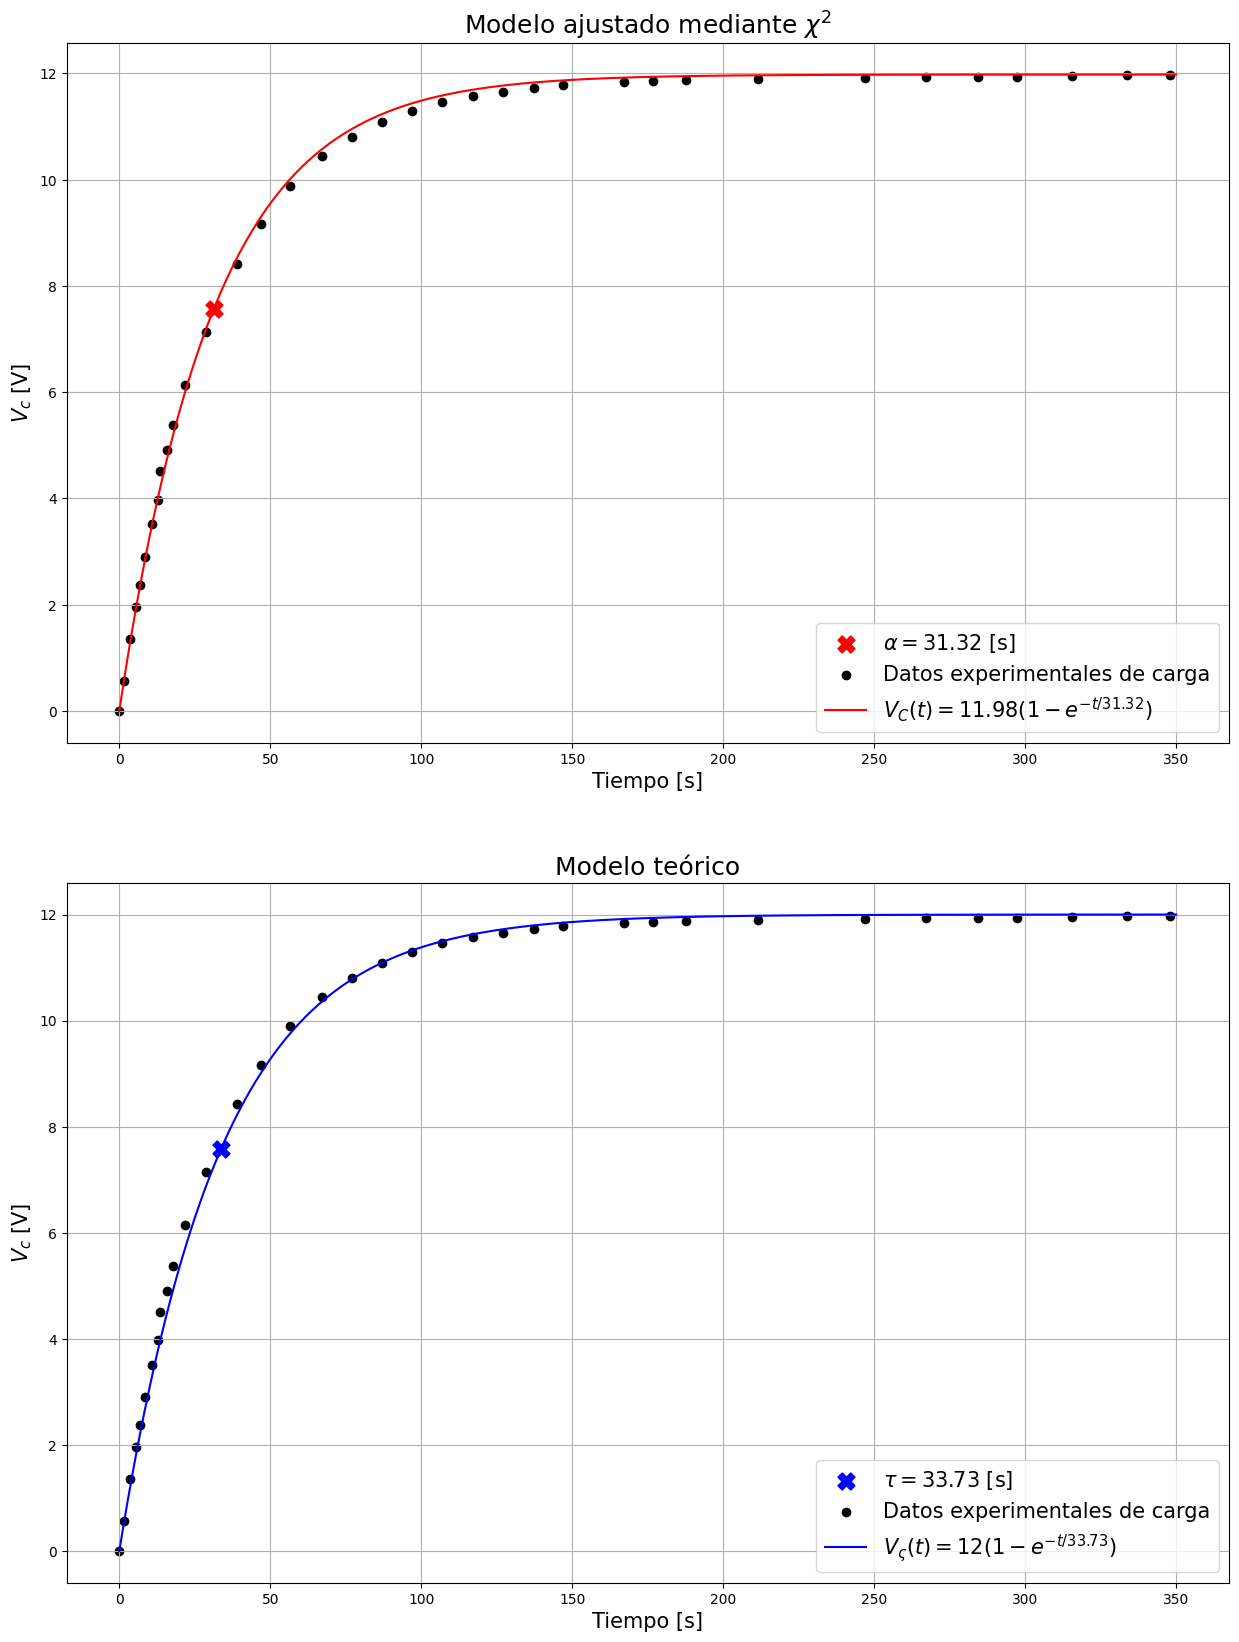

In [35]:

plt.figure(figsize=(15, 20))
plt.subplot(2,1,1)
plt.scatter(tau_expc,v_fit(tau_expc),marker="X",color="red",s=150,label=r"$\alpha=31.32$ [s]")
plt.scatter(t_cc,vc,label=("Datos experimentales de carga"),color="black")
plt.plot(t_fit,v_fit(t_fit),color="red",label="$V_C (t)=11.98(1-e^{-t/31.32})$")
plt.title("Modelo ajustado mediante $\chi^2$",fontsize=18)
plt.xlabel("Tiempo [s]",fontsize=15);plt.ylabel("$V_c$ [V]",fontsize=15)
plt.grid()
plt.legend(fontsize=15)

plt.subplot(2,1,2)
plt.scatter(tau_teo,v_teoteoteo(tau_teo),marker="X",color="blue",s=150,label=r"$\tau=33.73$ [s]")
plt.scatter(t_cc,vc,label=("Datos experimentales de carga"),color="black",marker="o")
#plt.errorbar(t_cc, vc,color="black", yerr=0.17, fmt='o', label='Datos experimentales', capsize=5,marker=".")
plt.plot(t_fit,v_teoteoteo(t_fit),color="blue",label=r"$V_{\varsigma} (t)=12(1-e^{-t/33.73})$")
plt.title("Modelo teórico",fontsize=18)
plt.xlabel("Tiempo [s]",fontsize=15);plt.ylabel("$V_c$ [V]",fontsize=15)
plt.grid()
plt.legend(fontsize=15)

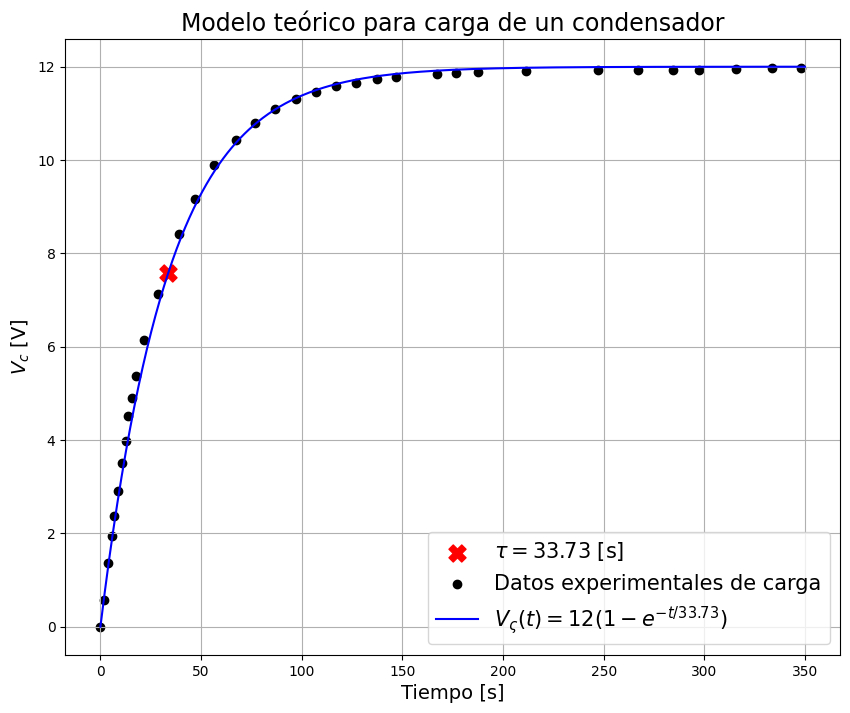

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(tau_teo,v_teoteoteo(tau_teo),marker="X",color="red",s=150,label=r"$\tau=33.73$ [s]")
plt.scatter(t_cc,vc,label=("Datos experimentales de carga"),color="black")
plt.plot(t_fit,v_teoteoteo(t_fit),color="blue",label=r"$V_{\varsigma} (t)=12(1-e^{-t/33.73})$")
plt.title("Modelo teórico para carga de un condensador",fontsize=17)
plt.xlabel("Tiempo [s]",fontsize=14);plt.ylabel("$V_c$ [V]",fontsize=14)
plt.grid()
plt.legend(fontsize=15)

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_19104\3028031409.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Modelo ajustado para carga de un condensador mediante $\chi^2$",fontsize=17)


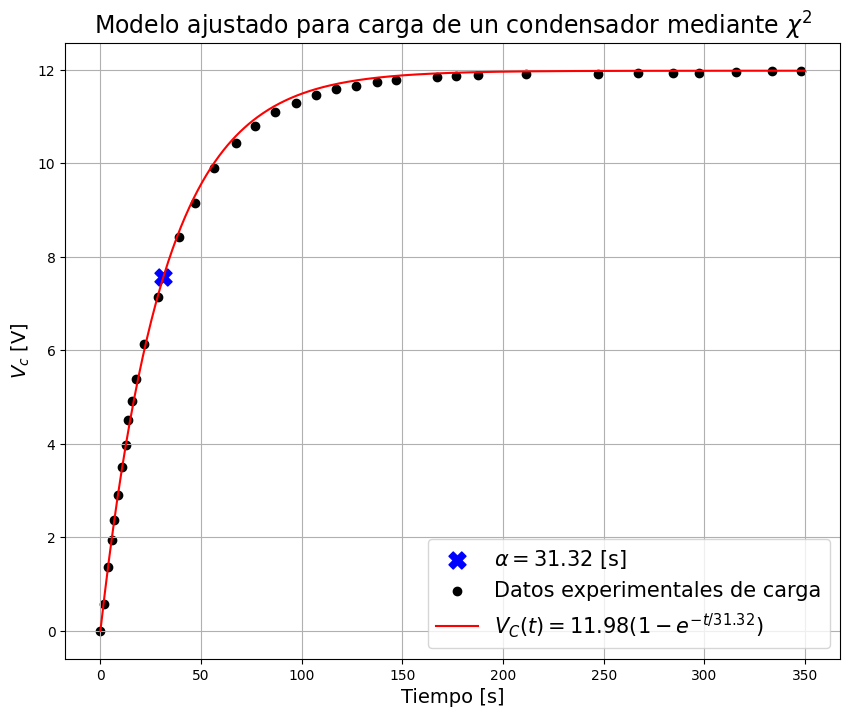

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(tau_expc,v_fit(tau_expc),marker="X",color="blue",s=150,label=r"$\alpha=31.32$ [s]")
plt.scatter(t_cc,vc,label=("Datos experimentales de carga"),color="black")
plt.plot(t_fit,v_fit(t_fit),color="red",label="$V_C (t)=11.98(1-e^{-t/31.32})$")
plt.title("Modelo ajustado para carga de un condensador mediante $\chi^2$",fontsize=17)
plt.xlabel("Tiempo [s]",fontsize=14);plt.ylabel("$V_c$ [V]",fontsize=14)
plt.grid()
plt.legend(fontsize=15)

C:\Users\ELXMA\AppData\Local\Temp\ipykernel_19104\989529752.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sum((vc - 11.98*(1-np.exp(-t_cc/t)))**2)
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_19104\989529752.py:2: RuntimeWarning: invalid value encountered in divide
  return np.sum((vc - 11.98*(1-np.exp(-t_cc/t)))**2)


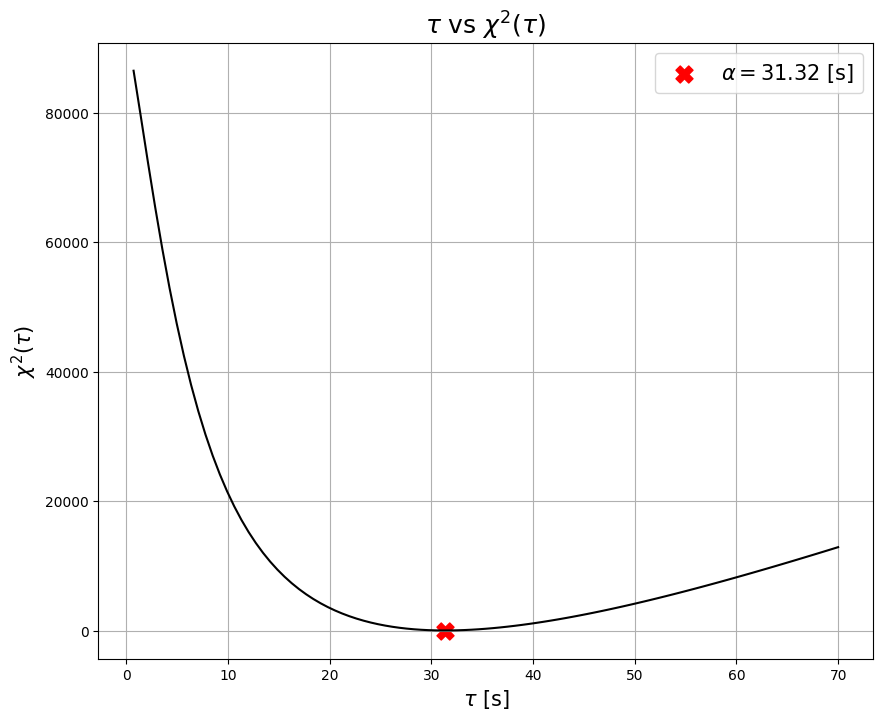

In [36]:

chi2_fits=[]
t_fits=[]

for t in np.linspace(0,70,100):
    chi22=modelo_c(t)/sigma_V**2
    chi2_fits.append(chi22)
    t_fits.append(t)
plt.figure(figsize=(10,8))
plt.scatter(tau_expc,chi2_redc,marker="X",color="red",s=150,label=r"$\alpha=31.32$ [s]")
plt.plot(t_fits,chi2_fits,color="black",markersize=5)
plt.grid(True)
plt.xlabel(r"$\tau$ [s]",fontsize=15)
plt.ylabel(r"$\chi^2(\tau)$",fontsize=15)
plt.title(r"$\tau$ vs $\chi^2(\tau)$",fontsize=18)
plt.legend(fontsize=15)

## **Descarga**

In [20]:
td=np.array([7.12,10.02,11.71,12.64,14.54,17.15,21.28,24.12,30.09,36.06,42.49,47.85,52.75,60.11,65.98,73.35,80.32,90.28,102.53,112.71,120.72,135.48,142.85,150.54,165.58,180.48,197.02,205.65,217.09,230.54])
tdd=td-7.12 # arreglo para que empiece de t=0
vd=np.array([11.98,11.52,11.00,10.73,10.08,9.35,8.34,7.72,6.47,5.42,4.44,3.87,3.37,2.84,2.33,1.88,1.59,1.18,0.84,0.63,0.51,0.35,0.29,0.27,0.24,0.2,0.08,0.07,0.05,0.04])

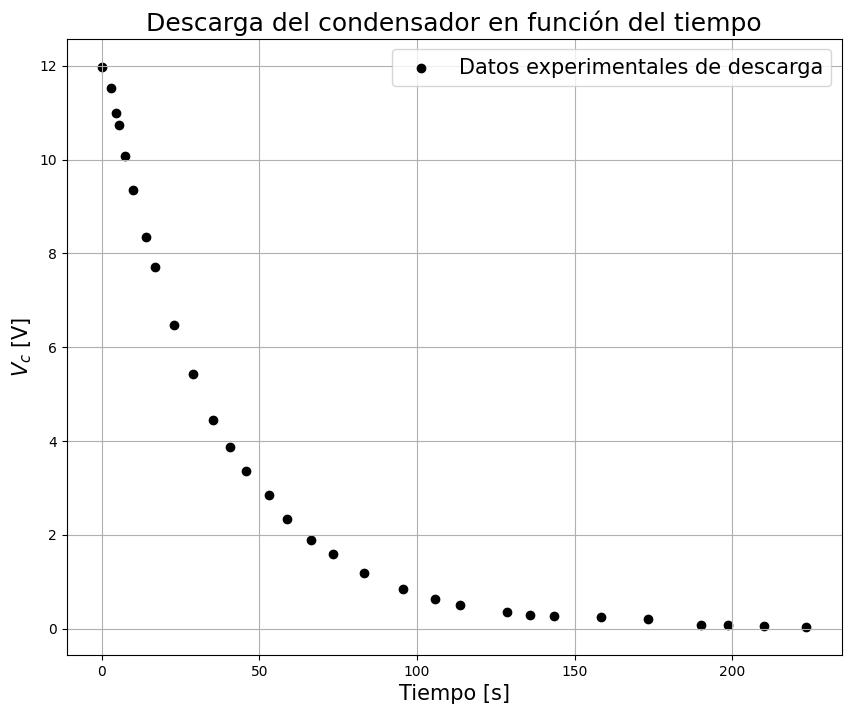

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(tdd,vd,label=("Datos experimentales de descarga"),color="black",marker="o")
#plt.errorbar(t_cc, vc,color="black", yerr=0.07, fmt='.', label='Datos experimentales', capsize=5,marker=".")
plt.title("Descarga del condensador en función del tiempo",fontsize=18)
plt.xlabel("Tiempo [s]",fontsize=15);plt.ylabel("$V_c$ [V]",fontsize=15)
plt.grid()
plt.legend(fontsize=15)

In [40]:
def modelo_d(t):
    return np.sum((vd - 11.98*np.exp(-tdd/t))**2)

# Establecer un valor inicial 
valor_inicial = 1 

# Utilizar minimize para encontrar que minimice la función objetivo
resultadod = optimize.minimize(modelo_d, valor_inicial)

# El valor de tiempo de relajación que minimiza la función objetivo
tau_expd = resultadod.x[0]

print(f"El tiempo de relajación de descarga es:",tau_expd," [s]")

El tiempo de relajación de descarga es: 37.023374700708686  [s]


In [42]:
def vc_teod(t):
    return (12*np.exp(-tdd/t))
sigma_V=0.1
chi2_valued = chi_squared(vd,vc_teod(tau_expd),sigma_V)
chi2_redd=chi2_valued/len(vd)
print(f"Valor de chi cuadrado: {chi2_valued}")
print(f"Valor de chi cuadrado reducido: {chi2_redd}")

t_fitd=np.linspace(0,225,500)
def v_fitd(t):
    return 11.98*np.exp(-t/tau_expd)

def v_teoteoteod(t):
    return 12*np.exp(-t/tau_teo)

Valor de chi cuadrado: 78.115686563865
Valor de chi cuadrado reducido: 2.6038562187955


<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_19104\2564452690.py:6: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Modelo ajustado mediante $\chi^2$")


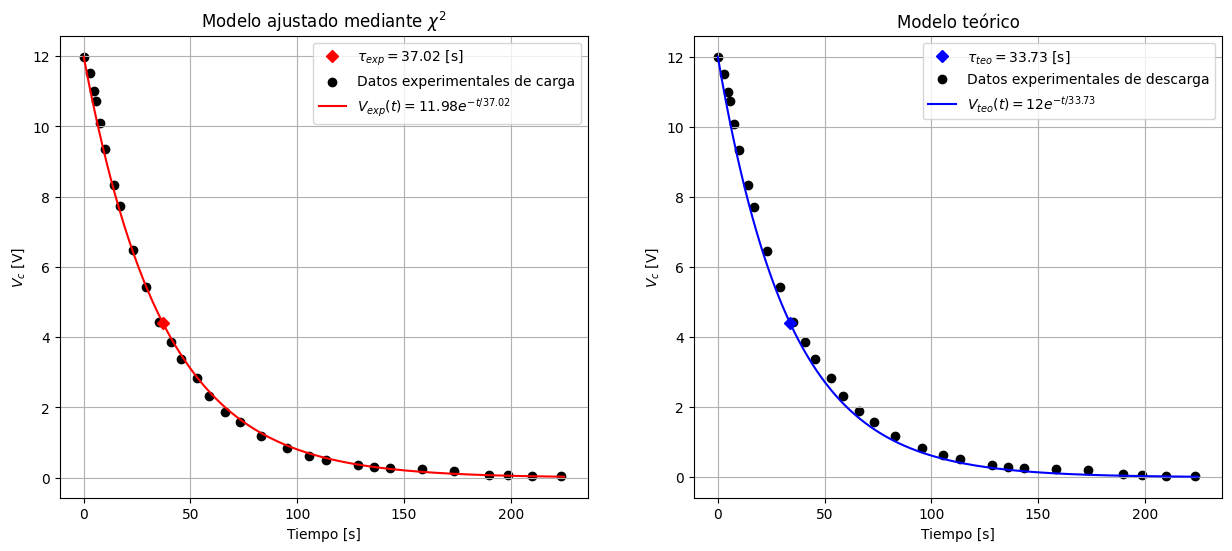

In [43]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(tau_expd,v_fitd(tau_expd),"Dr",label=r"$\tau_{exp}=37.02$ [s]")
plt.scatter(tdd,vd,label=("Datos experimentales de carga"),color="black")
plt.plot(t_fitd,v_fitd(t_fitd),color="red",label="$V_{exp} (t)=11.98e^{-t/37.02}$")
plt.title("Modelo ajustado mediante $\chi^2$")
plt.xlabel("Tiempo [s]");plt.ylabel("$V_c$ [V]")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(tau_teo,v_teoteoteod(tau_teo),"Db",label=r"$\tau_{teo}=33.73$ [s]")
plt.scatter(tdd,vd,label=("Datos experimentales de descarga"),color="black",marker="o")
#plt.errorbar(t_cc, vc,color="black", yerr=0.17, fmt='o', label='Datos experimentales', capsize=5,marker=".")
plt.plot(t_fitd,v_teoteoteod(t_fitd),color="blue",label="$V_{teo} (t)=12e^{-t/33.73}$")
plt.title("Modelo teórico")
plt.xlabel("Tiempo [s]");plt.ylabel("$V_c$ [V]")
plt.grid()
plt.legend()

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_19104\2127155042.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Modelo ajustado para descarga de un condensador mediante $\chi^2$",fontsize=17)


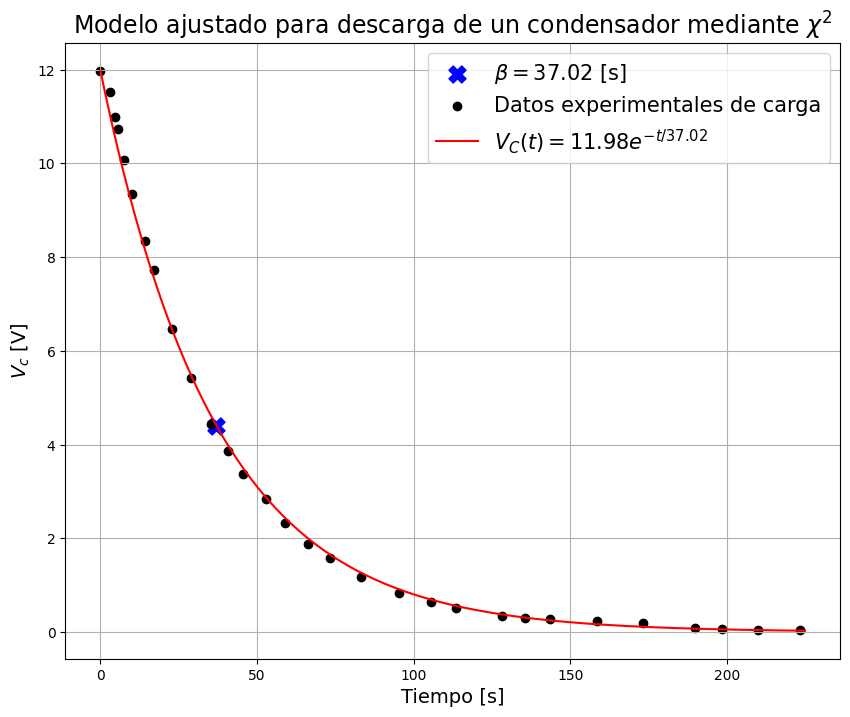

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(tau_expd,v_fitd(tau_expd),marker="X",color="blue",s=150,label=r"$\beta=37.02$ [s]")
plt.scatter(tdd,vd,label=("Datos experimentales de carga"),color="black")
plt.plot(t_fitd,v_fitd(t_fitd),color="red",label="$V_{C} (t)=11.98e^{-t/37.02}$")
plt.title("Modelo ajustado para descarga de un condensador mediante $\chi^2$",fontsize=17)
plt.xlabel("Tiempo [s]",fontsize=14);plt.ylabel("$V_c$ [V]",fontsize=14)
plt.grid()
plt.legend(fontsize=15)

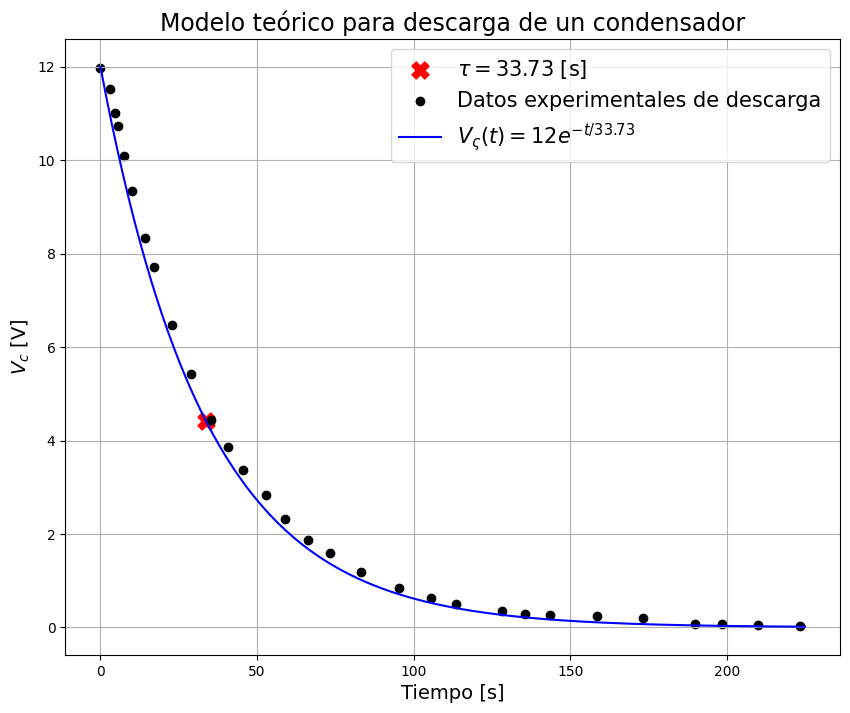

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(tau_teo,v_teoteoteod(tau_teo),marker="X",color="red",s=150,label=r"$\tau=33.73$ [s]")
#plt.plot(tau_teo,v_teoteoteod(tau_teo),"Db",label=r"$\tau_{teo}=33.73$ [s]")
plt.scatter(tdd,vd,label=("Datos experimentales de descarga"),color="black",marker="o")
#plt.errorbar(t_cc, vc,color="black", yerr=0.17, fmt='o', label='Datos experimentales', capsize=5,marker=".")
plt.plot(t_fitd,v_teoteoteod(t_fitd),color="blue",label=r"$V_{\varsigma} (t)=12e^{-t/33.73}$")
plt.title("Modelo teórico para descarga de un condensador", fontsize=17)
plt.xlabel("Tiempo [s]",fontsize=14);plt.ylabel("$V_c$ [V]", fontsize=14)
plt.grid()
plt.legend(fontsize=15)

C:\Users\ELXMA\AppData\Local\Temp\ipykernel_19104\710576333.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sum((vd - 11.98*np.exp(-tdd/t))**2)
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_19104\710576333.py:2: RuntimeWarning: invalid value encountered in divide
  return np.sum((vd - 11.98*np.exp(-tdd/t))**2)


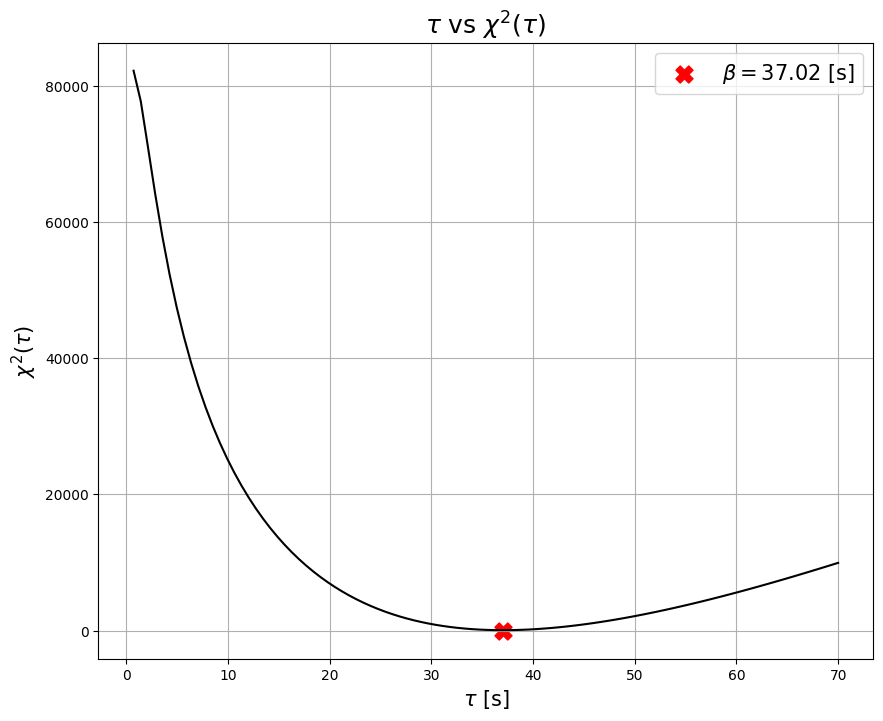

In [31]:
chi2_fits=[]
t_fits=[]

for t in np.linspace(0,70,100):
    chi22=modelo_d(t)/sigma_V**2
    chi2_fits.append(chi22)
    t_fits.append(t)
plt.figure(figsize=(10,8))
plt.scatter(tau_expd,chi2_redd,marker="X",color="red",s=150,label=r"$\beta=37.02$ [s]")
plt.plot(t_fits,chi2_fits,color="black",markersize=5)
plt.grid(True)
plt.xlabel(r"$\tau$ [s]",fontsize=15)
plt.ylabel(r"$\chi^2(\tau)$",fontsize=15)
plt.title(r"$\tau$ vs $\chi^2(\tau)$",fontsize=18)
plt.legend(fontsize=15)

## **Análisis estadístico de los tiempos de relajación**

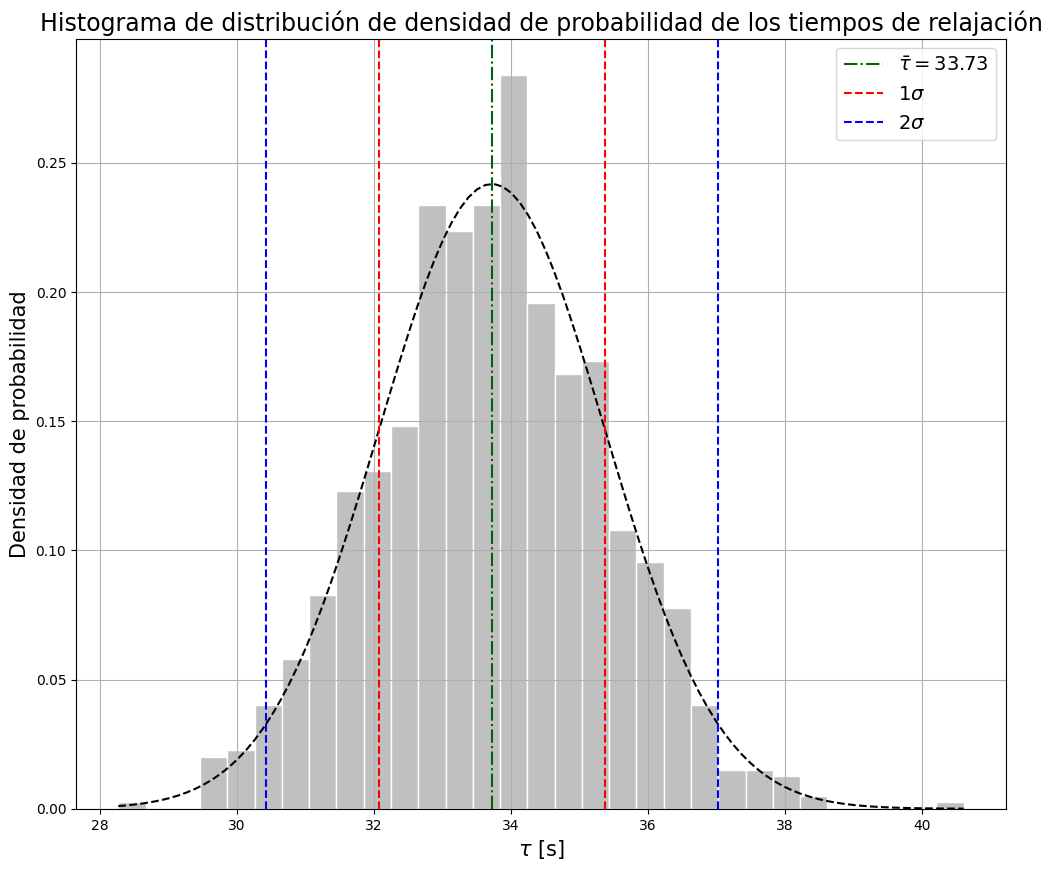

In [32]:
taumax=35.376;taumin=32.076
tau_lifts=np.linspace(taumin-10,taumax+10,1000)

# Graficando histograma
plt.figure(figsize=(12, 10))
mu, sigma = 33.726, 1.65 # media y desvio estandar
datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos,31,color = "silver",density=True,edgecolor = "white")
plt.ylabel('Densidad de probabilidad',fontsize=15)
plt.xlabel(r'$\tau$ [s]',fontsize=15)
plt.title('Histograma de distribución de densidad de probabilidad de los tiempos de relajación',fontsize=17)
# Curva de distribución normal ajustada (curva punteada)
x = np.linspace(min(datos), max(datos), 100)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, color="black",linestyle="--")

plt.axvline(np.mean(tau_lifts), color='darkgreen', linestyle='-.', label=R'$\bar{\tau}=33.73$')
plt.axvline(np.mean(tau_lifts)- 1.65, color='red', linestyle='--', label=r'1$\sigma$')
plt.axvline(np.mean(tau_lifts)+ 1.65, color='red', linestyle='--')
plt.axvline(np.mean(tau_lifts)- 2*1.65, color='blue', linestyle='--', label=r'2$\sigma$')
plt.axvline(np.mean(tau_lifts)+ 2*1.65, color='blue', linestyle='--')


plt.legend(fontsize=14)
plt.grid()
plt.show()